In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [3]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [4]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [5]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [6]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",na_values=["n/a","na","--"])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [8]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [9]:
cnt = 0

for row in df["OWN_OCCUPIED"]:
    try:
        int(row)
        df.loc[cnt,"OWN_OCCUPIED"] = np.nan
    except ValueError:
        pass
    cnt += 1

In [10]:
df["OWN_OCCUPIED"]

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

# Summarizing Missing Value

In [11]:
df.isnull().sum() # bisa juga pake isna

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [12]:
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [13]:
df.isnull().values.any()

True

In [14]:
df.isnull().sum().sum()

12

# Replacing

In [15]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [16]:
df["ST_NUM"].fillna(125,inplace=True)

In [17]:
df["ST_NUM"]

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [18]:
df["NUM_BEDROOMS"].median()

3.0

In [19]:
median = df["NUM_BEDROOMS"].median()
df["NUM_BEDROOMS"].fillna(median,inplace=True)

In [20]:
df["NUM_BEDROOMS"]

0    3.0
1    3.0
2    3.0
3    1.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [21]:
df["NUM_BEDROOMS"].median()

3.0

# Analyzing Obesity in England

In [22]:
%matplotlib inline
data = pd.ExcelFile("obes.xls")

In [23]:
data

In [24]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [25]:
data_age = data.parse(u"7.2",skiprows=4,skipfooter=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [26]:
data_age.shape

(12, 10)

In [27]:
data_age.rename(columns={u"Unnamed: 0":u"Year"},inplace=True)

In [28]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [29]:
data_age.dropna(inplace=True)

In [30]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [31]:
data_age.set_index("Year",inplace=True)

<AxesSubplot:xlabel='Year'>

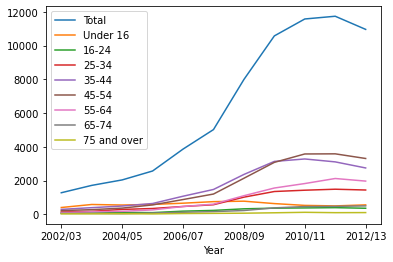

In [32]:
data_age.plot()

In [33]:
data_age_minus_total = data_age.drop("Total",axis=1)

<AxesSubplot:xlabel='Year'>

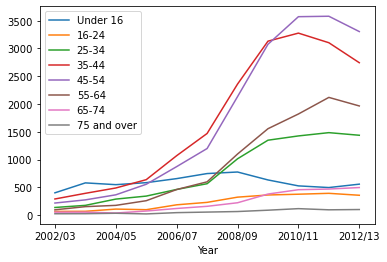

In [34]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

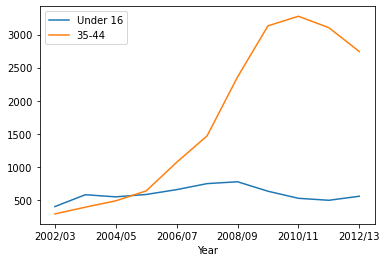

In [35]:
data_age["Under 16"].plot(label="Under 16",legend=True)
data_age["35-44"].plot(label="35-44",legend=True)

In [36]:
from datetime import datetime

In [37]:
date_rng = pd.date_range(start="1/01/2020",end="1/08/2020",freq="H")
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [38]:
df = pd.DataFrame(date_rng,columns=["date"])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [39]:
df["data"] = np.random.randint(0,100,size=(len(date_rng)))

In [40]:
df

,date,data
0,2020-01-01 00:00:00,77
1,2020-01-01 01:00:00,48
2,2020-01-01 02:00:00,55
3,2020-01-01 03:00:00,71
4,2020-01-01 04:00:00,57
...,...,...
164,2020-01-07 20:00:00,92
165,2020-01-07 21:00:00,43
166,2020-01-07 22:00:00,24
167,2020-01-07 23:00:00,97


In [41]:
df["datetime"] = pd.to_datetime(df["date"])

In [42]:
df = df.set_index("datetime")

In [43]:
df.drop(["date"],axis=1,inplace=True)

In [44]:
df

,data
datetime,
2020-01-01 00:00:00,77
2020-01-01 01:00:00,48
2020-01-01 02:00:00,55
2020-01-01 03:00:00,71
2020-01-01 04:00:00,57
...,...
2020-01-07 20:00:00,92
2020-01-07 21:00:00,43
2020-01-07 22:00:00,24


In [45]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [46]:
time_stamp_date_rng = pd.to_datetime(string_date_rng,infer_datetime_format=True)
time_stamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [47]:
string_date_rng_2 = ["June-01-2020","June-02-2020","June-03-2020"]

In [48]:
time_stamp_date_rng_2 = [datetime.strptime(x,"%B-%d-%Y") for x in string_date_rng_2]
time_stamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [49]:
df2 = pd.DataFrame(time_stamp_date_rng_2,columns=["date"])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [50]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,24
2020-01-02 01:00:00,66
2020-01-02 02:00:00,66
2020-01-02 03:00:00,68
2020-01-02 04:00:00,91
2020-01-02 05:00:00,11
2020-01-02 06:00:00,68
2020-01-02 07:00:00,7
2020-01-02 08:00:00,11


In [51]:
df["2020-01-01"]

C:\Users\User\AppData\Local\Temp/ipykernel_16492/4242563486.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2020-01-01"]


,data
datetime,
2020-01-01 00:00:00,77
2020-01-01 01:00:00,48
2020-01-01 02:00:00,55
2020-01-01 03:00:00,71
2020-01-01 04:00:00,57
2020-01-01 05:00:00,55
2020-01-01 06:00:00,70
2020-01-01 07:00:00,53
2020-01-01 08:00:00,10


In [52]:
df["2020-01-04":"2020-01-06"]

,data
datetime,
2020-01-04 00:00:00,87
2020-01-04 01:00:00,56
2020-01-04 02:00:00,21
2020-01-04 03:00:00,11
2020-01-04 04:00:00,78
...,...
2020-01-06 19:00:00,38
2020-01-06 20:00:00,65
2020-01-06 21:00:00,2


In [53]:
df.resample("D").mean()

,data
datetime,
2020-01-01,42.333333
2020-01-02,47.458333
2020-01-03,55.791667
2020-01-04,53.041667
2020-01-05,52.958333
2020-01-06,54.916667
2020-01-07,50.333333
2020-01-08,47.000000


In [54]:
df["rolling_sum"] = df.rolling(3).sum()
df

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,77,NaN
2020-01-01 01:00:00,48,NaN
2020-01-01 02:00:00,55,180.0
2020-01-01 03:00:00,71,174.0
2020-01-01 04:00:00,57,183.0
...,...,...
2020-01-07 20:00:00,92,192.0
2020-01-07 21:00:00,43,169.0
2020-01-07 22:00:00,24,159.0


In [55]:
df["rolling_rum_backfilled"] = df["rolling_sum"].fillna(method="backfill")
df

,data,rolling_sum,rolling_rum_backfilled
datetime,,,
2020-01-01 00:00:00,77,NaN,180.0
2020-01-01 01:00:00,48,NaN,180.0
2020-01-01 02:00:00,55,180.0,180.0
2020-01-01 03:00:00,71,174.0,174.0
2020-01-01 04:00:00,57,183.0,183.0
...,...,...,...
2020-01-07 20:00:00,92,192.0,192.0
2020-01-07 21:00:00,43,169.0,169.0
2020-01-07 22:00:00,24,159.0,159.0


In [56]:
opsd_daily = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv")
opsd_daily.shape

(4383, 5)

In [57]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [58]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [59]:
opsd_daily = opsd_daily.set_index("Date")
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [60]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [61]:
opsd_daily = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv",index_col=0,parse_dates=True)
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [62]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [63]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday"] = opsd_daily.index.weekday

In [64]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [65]:
opsd_daily.loc["2017-08-10"]

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [66]:
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


In [67]:
opsd_daily.loc["2012-02"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<AxesSubplot:xlabel='Date'>

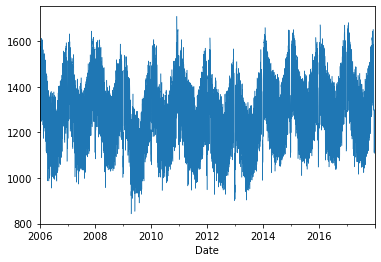

In [68]:
opsd_daily["Consumption"].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

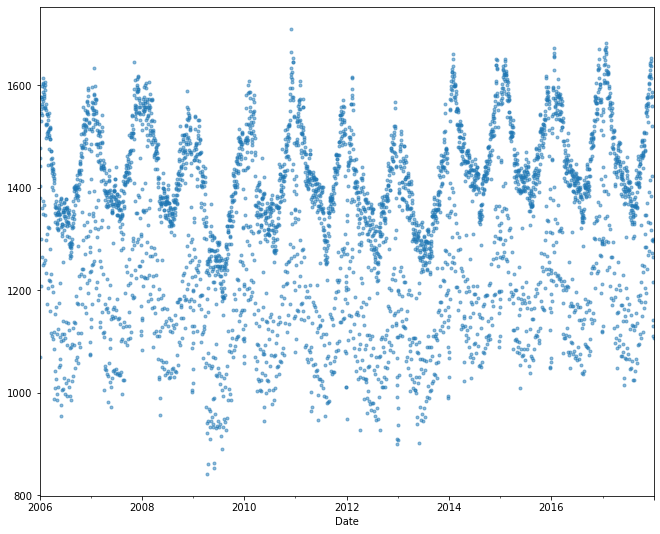

In [69]:
opsd_daily["Consumption"].plot(marker=".",alpha=0.5,linestyle="None",figsize=(11,9))

<AxesSubplot:xlabel='Date'>

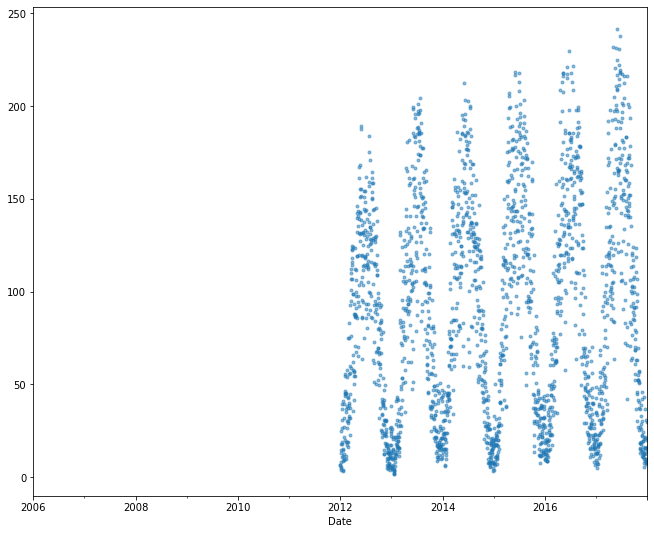

In [70]:
opsd_daily["Solar"].plot(marker=".",alpha=0.5,linestyle="None",figsize=(11,9))

<AxesSubplot:xlabel='Date'>

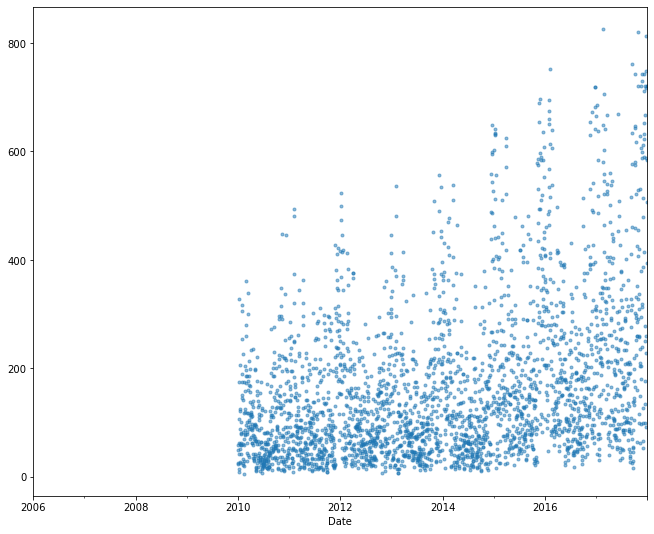

In [71]:
opsd_daily["Wind"].plot(marker=".",alpha=0.5,linestyle="None",figsize=(11,9))

Text(0, 0.5, 'Daily Consumption (Gwh)')

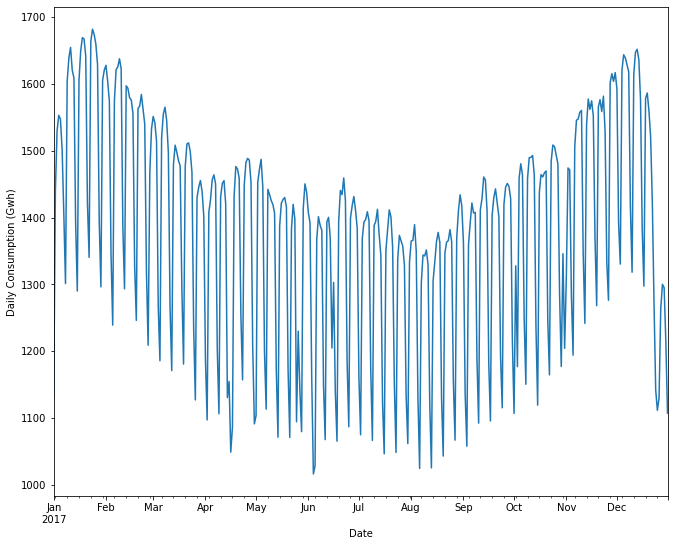

In [72]:
ax = opsd_daily.loc["2017","Consumption"].plot(figsize=(11,9))
ax.set_ylabel("Daily Consumption (Gwh)")

Text(0, 0.5, 'Daily Consumption (Gwh)')

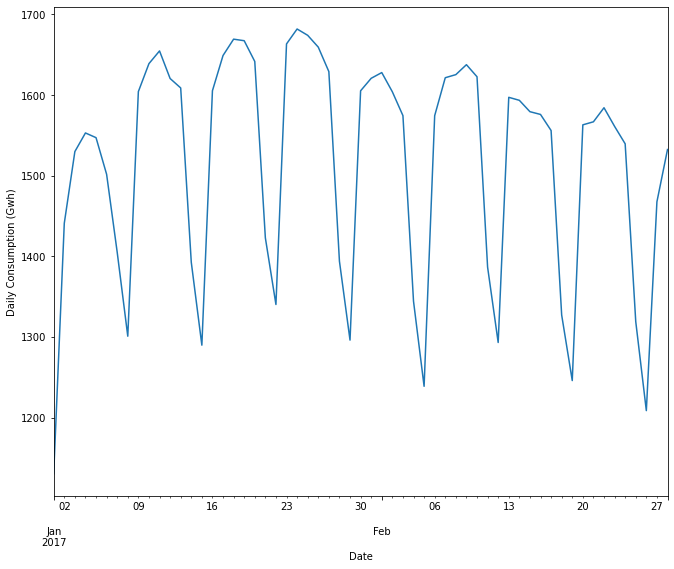

In [73]:
ax = opsd_daily.loc["2017-01":"2017-02","Consumption"].plot(figsize=(11,9))
ax.set_ylabel("Daily Consumption (Gwh)")

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

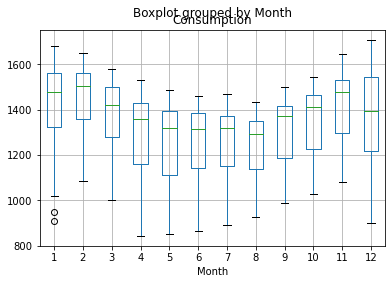

In [74]:
opsd_daily.boxplot(column=["Consumption"],by="Month")

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

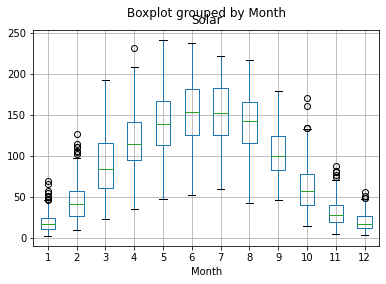

In [75]:
opsd_daily.boxplot(column=["Solar"],by="Month")

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

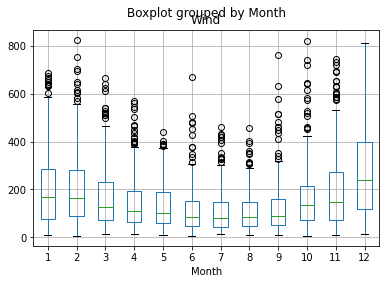

In [76]:
opsd_daily.boxplot(column=["Wind"],by="Month")

In [77]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

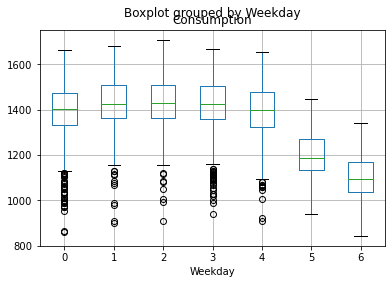

In [78]:
opsd_daily.boxplot(column=["Consumption"],by="Weekday")

In [79]:
data_columns = ["Consumption","Wind","Solar","Wind+Solar"]
opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [80]:
opsd_daily.shape

(4383, 7)

In [81]:
opsd_weekly_mean.shape

(627, 4)

<AxesSubplot:xlabel='Date'>

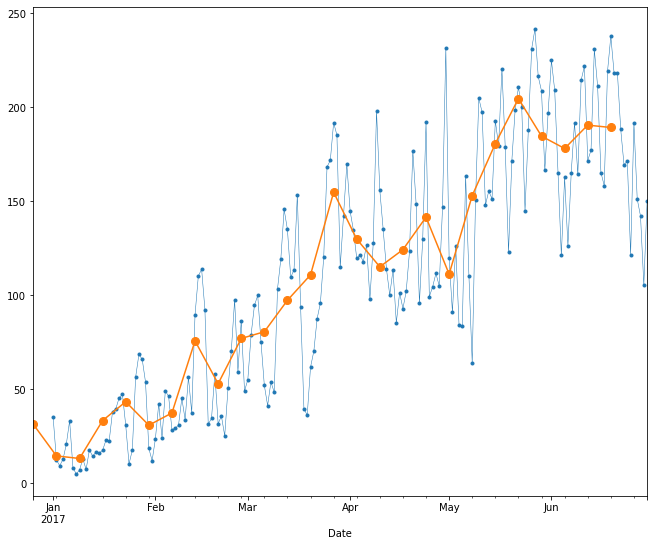

In [82]:
start,end = "2017-01","2017-06"

opsd_daily.loc[start:end,"Solar"].plot(marker=".",linestyle="-",linewidth=0.5,figsize=(11,9))
opsd_weekly_mean.loc[start:end,"Solar"].plot(marker="o",markersize=8,linestyle="-",figsize=(11,9))